In [ ]:
pip install yfinance

In [ ]:
pip install pyod

In [1]:
ticker = "TSLA"
company = "Tesla"
import yfinance as yf
import pandas as pd
import numpy as np

start_date = '2015-01-01'
end_date ='2022-12-31'

df = yf.download(ticker,start = start_date,end=end_date)
df = df[["Close","Volume"]]
df.index = df.index.strftime('%d/%m/%Y')
df = pd.DataFrame(df)
df = df.reset_index()
df


[*********************100%%**********************]  1 of 1 completed


,Date,Close,Volume
0,02/01/2015,14.620667,71466000
1,05/01/2015,14.006000,80527500
2,06/01/2015,14.085333,93928500
3,07/01/2015,14.063333,44526000
4,08/01/2015,14.041333,51637500
...,...,...,...
2009,23/12/2022,123.150002,166989700
2010,27/12/2022,109.099998,208643400
2011,28/12/2022,112.709999,221070500
2012,29/12/2022,121.820000,221923300


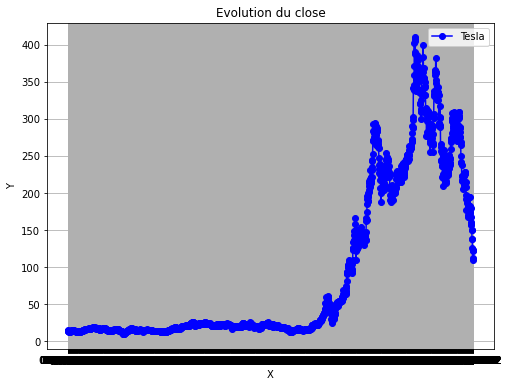

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# Créer un graphique avec "X" en abscisse et "Y" en ordonnée
plt.figure(figsize=(8, 6))
plt.plot(df['Date'],df['Close'], marker='o', linestyle='-', color='b', label=company)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Evolution du close')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
df['growth_rate_3_days'] = df['Close'].pct_change(periods=3)

df['growth_rate_1_month'] = df['Close'].pct_change(periods=30)

df['growth_rate_3_months'] = df['Close'].pct_change(periods=90)

df['growth_rate_volume_3_days'] = df['Volume'].pct_change(periods=3)

df['growth_rate_volume_1_month'] = df['Volume'].pct_change(periods=30)

df['growth_rate_volume_3_months'] = df['Volume'].pct_change(periods=90)

Data_close_growthrates = df.dropna()
Data_close_growthrates.head()
Data_close_growthrates.shape[0]
Data_close_growthrates

,Date,Close,Volume,growth_rate_3_days,growth_rate_1_month,growth_rate_3_months,growth_rate_volume_3_days,growth_rate_volume_1_month,growth_rate_volume_3_months
90,13/05/2015,16.212000,81603000,0.027767,0.288234,0.108841,0.165374,0.082282,0.141844
91,14/05/2015,16.273333,43438500,0.019249,0.301242,0.161883,-0.489466,-0.236837,-0.460576
92,15/05/2015,16.589333,67914000,0.016752,0.302827,0.177774,-0.288494,-0.096360,-0.276961
93,18/05/2015,16.583332,50298000,0.022905,0.224766,0.179189,-0.383626,-0.730792,0.129632
94,19/05/2015,16.476000,55113000,0.012454,0.215941,0.173393,0.268759,-0.154948,0.067306
...,...,...,...,...,...,...,...,...,...
2009,23/12/2022,123.150002,166989700,-0.106314,-0.354289,-0.594897,0.046542,0.258372,1.428376
2010,27/12/2022,109.099998,208643400,-0.206949,-0.443282,-0.639779,0.434790,0.823749,3.392446
2011,28/12/2022,112.709999,221070500,-0.100838,-0.409741,-0.620079,0.052264,1.397036,2.600772
2012,29/12/2022,121.820000,221923300,-0.010800,-0.373418,-0.579805,0.328964,1.430869,2.974043


In [4]:
Data = pd.read_csv("Data_traitée_avec_sentiment.csv")
Data.head()


,Unnamed: 0,tweet_id,post_date,comment_num,retweet_num,like_num,ticker_symbol,Open,Close,Volume,Compound_Sentiment,Gold_Close,Gold_Volume,US_bonds_price,week,year,day,month
0,0,550441509175443456,2015-01-01,0,0,1,AAPL,NaN,NaN,NaN,0.0000,NaN,NaN,2.17,1,2015,1,1
1,1,550441672312512512,2015-01-01,0,0,0,AAPL,NaN,NaN,NaN,-0.8271,NaN,NaN,2.17,1,2015,1,1
2,2,550443807834402816,2015-01-01,0,0,1,AAPL,NaN,NaN,NaN,0.0000,NaN,NaN,2.17,1,2015,1,1
3,3,550443808606126081,2015-01-01,0,0,1,AAPL,NaN,NaN,NaN,0.0000,NaN,NaN,2.17,1,2015,1,1
4,4,550443809700851716,2015-01-01,0,0,1,AAPL,NaN,NaN,NaN,0.0000,NaN,NaN,2.17,1,2015,1,1


In [5]:
Data_sentiment = Data[["post_date","Compound_Sentiment"]]
Data_sentiment.rename(columns={'post_date': 'Date'}, inplace=True)

C:\Users\CYTech Student\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [6]:
Data_sentiment

,Date,Compound_Sentiment
0,2015-01-01,0.0000
1,2015-01-01,-0.8271
2,2015-01-01,0.0000
3,2015-01-01,0.0000
4,2015-01-01,0.0000
...,...,...
1381459,2020-01-01,0.4939
1381460,2020-01-01,0.7574
1381461,2020-01-01,-0.3382
1381462,2020-01-01,0.0000


In [8]:
import numpy as np
import pandas as pd
from pyod.models.knn import KNN   # Exemple avec le modèle KNN (K-Nearest Neighbors)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [9]:
Data_sentiment['Date'] = pd.to_datetime(Data_sentiment['Date'])

# Formater la colonne "Date" dans le nouveau format "JJ/MM/AAAA"
Data_sentiment['Date'] = Data_sentiment['Date'].dt.strftime('%d/%m/%Y')

C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_11384/774209626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_sentiment['Date'] = pd.to_datetime(Data_sentiment['Date'])
C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_11384/774209626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_sentiment['Date'] = Data_sentiment['Date'].dt.strftime('%d/%m/%Y')


In [10]:
df.head()
df.shape[0]

2014

In [11]:
Data_sentiment.head()
Data_sentiment.shape[0]

1381464

In [12]:
merged_data_sentiment = df.merge(Data_sentiment, on='Date', how='inner')

# Afficher le DataFrame fusionné
merged_data_sentiment
nombre_de_nan = merged_data_sentiment['growth_rate_3_days'].isna().sum()

# Afficher le nombre de NaN
print("Nombre de NaN dans la colonne :", nombre_de_nan)
merged_data_sentiment_sans_nan = merged_data_sentiment.dropna()

Nombre de NaN dans la colonne : 3084


In [13]:
merged_data_sentiment_sans_nan.head()

,Date,Close,Volume,growth_rate_3_days,growth_rate_1_month,growth_rate_3_months,growth_rate_volume_3_days,growth_rate_volume_1_month,growth_rate_volume_3_months,Compound_Sentiment
130937,13/05/2015,16.212,81603000,0.027767,0.288234,0.108841,0.165374,0.082282,0.141844,0.0000
130938,13/05/2015,16.212,81603000,0.027767,0.288234,0.108841,0.165374,0.082282,0.141844,0.7096
130939,13/05/2015,16.212,81603000,0.027767,0.288234,0.108841,0.165374,0.082282,0.141844,0.6369
130940,13/05/2015,16.212,81603000,0.027767,0.288234,0.108841,0.165374,0.082282,0.141844,0.4574
130941,13/05/2015,16.212,81603000,0.027767,0.288234,0.108841,0.165374,0.082282,0.141844,-0.1027


In [14]:
import pandas as pd
import numpy as np

# Supprimez la classe Dataset et utilisez directement le DataFrame
df = merged_data_sentiment_sans_nan
y_graph = df[["Date","Close"]]
# Obtenez X en copiant le DataFrame sauf la première colonne
X = df.drop('Close', axis=1)

# Obtenez y à partir de la première colonne du DataFrame
y = df.loc[:, "Close"].values.tolist()  # Sélectionnez la colonne cible et convertissez-la en liste


X

,Date,Volume,growth_rate_3_days,growth_rate_1_month,growth_rate_3_months,growth_rate_volume_3_days,growth_rate_volume_1_month,growth_rate_volume_3_months,Compound_Sentiment
130937,13/05/2015,81603000,0.027767,0.288234,0.108841,0.165374,0.082282,0.141844,0.0000
130938,13/05/2015,81603000,0.027767,0.288234,0.108841,0.165374,0.082282,0.141844,0.7096
130939,13/05/2015,81603000,0.027767,0.288234,0.108841,0.165374,0.082282,0.141844,0.6369
130940,13/05/2015,81603000,0.027767,0.288234,0.108841,0.165374,0.082282,0.141844,0.4574
130941,13/05/2015,81603000,0.027767,0.288234,0.108841,0.165374,0.082282,0.141844,-0.1027
...,...,...,...,...,...,...,...,...,...
1192695,31/12/2019,154285500,-0.029262,0.187864,0.883097,-0.032744,1.138844,0.568181,0.0772
1192696,31/12/2019,154285500,-0.029262,0.187864,0.883097,-0.032744,1.138844,0.568181,0.0772
1192697,31/12/2019,154285500,-0.029262,0.187864,0.883097,-0.032744,1.138844,0.568181,0.0000
1192698,31/12/2019,154285500,-0.029262,0.187864,0.883097,-0.032744,1.138844,0.568181,-0.0772


In [15]:
y_graph
y_graph = y_graph.drop_duplicates(subset=['Date',"Close"])
y_graph

,Date,Close
130937,13/05/2015,16.212000
131045,14/05/2015,16.273333
131863,15/05/2015,16.589333
132864,18/05/2015,16.583332
134695,19/05/2015,16.476000
...,...,...
1189885,24/12/2019,28.350000
1190234,26/12/2019,28.729334
1190913,27/12/2019,28.691999
1191296,30/12/2019,27.646667


In [21]:
import pandas as pd
import matplotlib.pyplot as plt


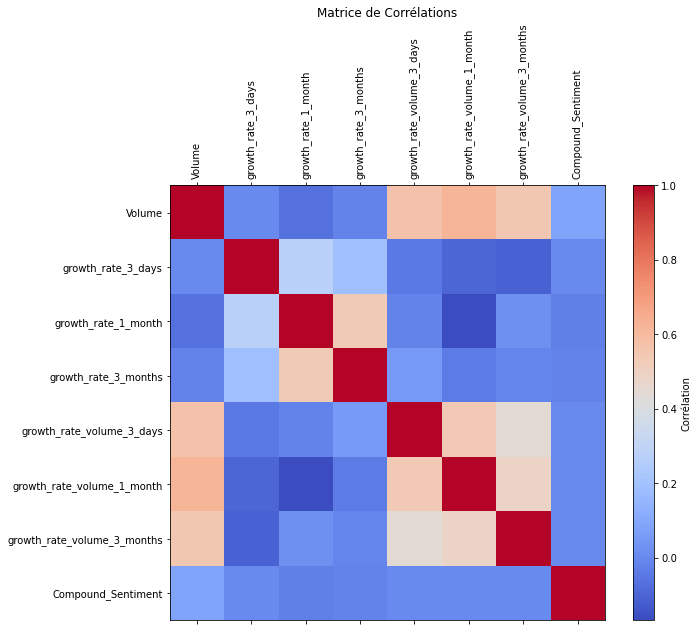

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Supposons que vous avez un DataFrame nommé "df" avec des colonnes "Date" et d'autres données
df = X
# Étape 1 : Calculer la matrice de corrélations (en supprimant la première colonne "Date")
correlation_matrix = X.drop(columns=['Date']).corr()

# Étape 2 : Créer un DataFrame de corrélations
correlation_df = pd.DataFrame(correlation_matrix, columns=correlation_matrix.columns, index=correlation_matrix.columns)

# Étape 3 : Créer un graphique
plt.figure(figsize=(10, 8))
plt.matshow(correlation_df, cmap='coolwarm', fignum=0)
plt.colorbar(label='Corrélation')
plt.xticks(range(len(correlation_df.columns)), correlation_df.columns, rotation=90)
plt.yticks(range(len(correlation_df.columns)), correlation_df.columns)
plt.title('Matrice de Corrélations')
plt.show()


In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Convertir la liste X en un DataFrame pandas sans nom de colonnes
X_df = pd.DataFrame(X)
# Initialiser LabelEncoder
label_encoder = LabelEncoder()

# Transformer les étiquettes en valeurs entières
y = label_encoder.fit_transform(y)

# X_df contient maintenant les caractéristiques sous forme de DataFrame pandas avec des noms de colonnes par défaut
# y_encoded contient les étiquettes sous forme de valeurs entières


In [24]:
X_df

,Date,Volume,growth_rate_3_days,growth_rate_1_month,growth_rate_3_months,growth_rate_volume_3_days,growth_rate_volume_1_month,growth_rate_volume_3_months,Compound_Sentiment
130937,13/05/2015,81603000,0.027767,0.288234,0.108841,0.165374,0.082282,0.141844,0.0000
130938,13/05/2015,81603000,0.027767,0.288234,0.108841,0.165374,0.082282,0.141844,0.7096
130939,13/05/2015,81603000,0.027767,0.288234,0.108841,0.165374,0.082282,0.141844,0.6369
130940,13/05/2015,81603000,0.027767,0.288234,0.108841,0.165374,0.082282,0.141844,0.4574
130941,13/05/2015,81603000,0.027767,0.288234,0.108841,0.165374,0.082282,0.141844,-0.1027
...,...,...,...,...,...,...,...,...,...
1192695,31/12/2019,154285500,-0.029262,0.187864,0.883097,-0.032744,1.138844,0.568181,0.0772
1192696,31/12/2019,154285500,-0.029262,0.187864,0.883097,-0.032744,1.138844,0.568181,0.0772
1192697,31/12/2019,154285500,-0.029262,0.187864,0.883097,-0.032744,1.138844,0.568181,0.0000
1192698,31/12/2019,154285500,-0.029262,0.187864,0.883097,-0.032744,1.138844,0.568181,-0.0772


In [25]:
y

array([ 398,  398,  398, ..., 1129, 1129, 1129], dtype=int64)

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import make_scorer, roc_auc_score

# Supprimez la colonne "Date" si nécessaire
X = X_df.drop(columns=['Date'])

# Définition des paramètres à tester
parameters = {'contamination': [0.05, 0.1, 0.15, 0.2]}  # Facteur de contamination

# Initialisation de l'Isolation Forest
isolation_forest = IsolationForest(random_state=42)
#behaviour='new'
# Initialisez la recherche de grille avec la métrique AUC-ROC
scorer = make_scorer(roc_auc_score)
grid_search = GridSearchCV(isolation_forest, parameters, cv=5, scoring=scorer)

# Entraînement du modèle
grid_search.fit(X)

# Affichage du meilleur facteur de contamination trouvé
best_contamination = grid_search.best_params_['contamination']
print("Meilleur facteur de contamination trouvé :", best_contamination)


C:\Users\CYTech Student\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\CYTech Student\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\CYTech Student\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\CYTech Student\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:

C:\Users\CYTech Student\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\CYTech Student\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\CYTech Student\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\CYTech Student\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np

# Initialisation de l'Isolation Forest
isolation_forest = IsolationForest(random_state=42)

# Entraînement de l'Isolation Forest sur les données
isolation_forest.fit(X)

# Obtenez les scores d'anomalie pour chaque point de données
anomaly_scores = isolation_forest.decision_function(X)

# Remplacez les scores des points non anormaux par 0
anomaly_scores[anomaly_scores >= 0] = 0

anomaly_scores


In [ ]:

# Créez un nouveau DataFrame en copiant les données de X
X_with_anomaly_scores = X.copy()

# Ajoutez la colonne "Anomaly_Score" aux scores d'anomalie
X_with_anomaly_scores["Anomaly_Score"] = anomaly_scores

# Affichez le DataFrame avec les scores d'anomalie
X_with_anomaly_scores


pour scores d'anomalie >0 

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Supposons que vous ayez un DataFrame nommé "X" contenant vos données
# Initialisez l'Isolation Forest
isolation_forest = IsolationForest(random_state=42)

# Entraînez l'Isolation Forest sur les données
isolation_forest.fit(X)

# Obtenez les scores d'anomalie pour chaque point de données
anomaly_scores = isolation_forest.decision_function(X)

# Créez un masque booléen pour filtrer les lignes avec des scores d'anomalie positifs ou égaux à zéro
mask = anomaly_scores >= 0

# Appliquez le masque pour obtenir les lignes filtrées
X_filtered = X[mask]

# Créez des graphiques pour les valeurs des colonnes du DataFrame filtré
for col in X_filtered.columns:
    plt.figure(figsize=(8, 6))
    plt.plot(X_filtered.index, X_filtered[col], marker='o', linestyle='-', color='b')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.title(f'Graphique pour la colonne "{col}" (Scores d\'anomalie >= 0)')
    plt.grid(True)
    plt.show()


from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

 Définition des paramètres à tester
parameters_ = {'hidden_layer_sizes': [10, 20, 30],
               'activation': ['identity', 'logistic', 'relu', 'softmax', 'tanh'],
               'max_iter':[100,200,300]}

def parameters_search(df,X,y):
    # Appeler class Dataset
    obj = df

    # Initialisation du classificateur MLP
    mlp = MLPClassifier()

    # Initialisation de la recherche de grille
    grid_search = GridSearchCV(mlp, parameters_, cv=5)

    # Entraînement du modèle
    grid_search.fit(X, y)

    # Affichage des meilleurs paramètres trouvés
    print("Meilleurs paramètres trouvés :")
    dict_best_params = grid_search.best_params_
    print(dict_best_params)

    # Affichage de la performance sur les données de validation
    best_score = grid_search.best_score_
    print("Score de validation : ", best_score)

Appeler la fonction parameters_search avec un DataFrame 'df' en argument
Model1 = parameters_search(df,X,y)





# top 0,001% sentiment scores

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = X_with_anomaly_scores

liste_col = ["Compound_Sentiment", "Anomaly_Score"]
ascending = [False, False]  # Vous vouliez probablement dire "ascending" plutôt que "adscending"

for i in liste_col:
    for j in ascending:

        # Supposons que 'df' est votre DataFrame avec les colonnes 'date' et 'anomalie'

        # Triez le DataFrame par ordre décroissant selon la colonne 'anomalie'
        df_sorted = df.sort_values(by=i, ascending=j)

        if j == False:
            a = "Bottom"
        else:
            a = "Top"

        data = f'{a}_0001_percent{i}'
        
        # Calculez le nombre d'éléments correspondant au top 0,001 % (arrondi à l'entier supérieur)
        num_elements = int(len(df_sorted) * 0.00001)

        # Sélectionnez les premiers 0,001 % des données triées (les plus élevées pour "Top")
        if j == True:
            df_selected = df_sorted.head(num_elements)
        else:
            df_selected = df_sorted.tail(num_elements)

        # Supprimez les doublons
        df_selected = df_selected.drop_duplicates()

        print(data)
        print(df_selected)
        
        # Créer la figure
        plt.figure(figsize=(10, 6))

        # Tracer la première série de données (Anomaly_Score)
        plt.scatter(df_selected['Date'], df_selected['Anomaly_Score'], marker='o', linestyle='-', color='b', label='Anomaly Score')

        # Tracer la première série de données (Anomaly_Score)
        plt.scatter(df_selected['Date'], df_selected['Compound_Sentiment'], marker='o', linestyle='-', color='r', label='Compound_Sentiment')

        
        print("###########\n\n############")


In [ ]:
print(df_selected)

In [ ]:
import matplotlib.pyplot as plt

df = X_with_anomaly_scores

liste_col = ["Compound_Sentiment", "Anomaly_Score"]
ascending = [False, False]

for i, j in zip(liste_col, ascending):
    # Sort the DataFrame by the current column
    df_sorted = df.sort_values(by=i, ascending=j)

    if j == False:
        a = "Bottom"
    else:
        a = "Top"

    data = f'{a}_0001_percent{i}'

    # Calculate the number of elements corresponding to the top 0.001% (rounded up)
    num_elements = int(len(df_sorted) * 0.00001)

    # Select the first 0.001% of the sorted data (the highest for "Top")
    if j == True:
        df_selected = df_sorted.head(num_elements)
    else:
        df_selected = df_sorted.tail(num_elements)

    # Remove duplicates
    df_selected = df_selected.drop_duplicates()

    print(data)
    print(df_selected)

    # Create the figure
    plt.figure(figsize=(10, 6))

    # Plot the first data series (Anomaly_Score)
    plt.scatter(df_selected['Date'], df_selected['Anomaly_Score'], marker='o', linestyle='-', color='b', label='Anomaly Score')

    # Plot the second data series (Compound_Sentiment)
    plt.scatter(df_selected['Date'], df_selected['Compound_Sentiment'], marker='o', linestyle='-', color='r', label='Compound_Sentiment')

    print("###########\n\n############")


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Créer la figure
plt.figure(figsize=(10, 6))

# Tracer la première série de données (Anomaly_Score)
plt.scatter(top01_Anomaly['Date'], top01_Anomaly['Anomaly_Score'], marker='o', linestyle='-', color='b', label='Anomaly Score')

# Créer un deuxième axe des ordonnées partageant le même axe des abscisses
plt2 = plt.twinx()

# Tracer la deuxième série de données (Compound_Sentiment) sur le deuxième axe
plt2.scatter(top01_Anomaly['Date'], top01_Anomaly['Compound_Sentiment'], marker='o', linestyle='-', color='r', label='Compound Sentiment')

# Configurer les étiquettes et les titres
plt.title("Scores d'Anomalie et Sentiment en fonction de la Date (top 0,001 % des compound sentiments)")
plt.xlabel('Date')
plt.ylabel('Anomalie')
plt2.set_ylabel('Sentiment')

# Facultatif : Pour afficher la date sur l'axe des x de manière plus lisible
plt.xticks(rotation=45)

# Afficher la légende pour chaque série de données
plt.legend(loc='upper left', fontsize='medium')
plt2.legend(loc='upper right', fontsize='medium')

# Afficher le graphique
plt.tight_layout()
plt.show()


# top 0,001% sentiment 

In [ ]:
# Triez le DataFrame par ordre décroissant de sentiment
df_sorted = df.sort_values(by='Anomaly_Score', ascending=False)

# Calculez la taille du top 25%
top_01_sentiment = int(len(df_sorted) * 0.001)

# Sélectionnez les 25 % supérieurs
top_01_sentiment = df_sorted.head(top_01_sentiment)

# Affichez le résultat
print("top 0,001 % based on sentiment")
top_01_sentiment
print("\nBottom 0,001 % based on anomaly:")
bottom_01_percent_anomaly

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(top_01_sentiment['Date'],top_01_sentiment['Anomaly_Score'], color='b')
plt.scatter(bottom_01_percent_anomaly['Date'],bottom_01_percent_anomaly['Anomaly_Score'], color='r')
plt2 = plt.twinx()
plt2.scatter(top_01_sentiment['Date'],top_01_sentiment['Compound_Sentiment'],color='y')
plt.title("Scores d'Anomalie et Sentiment en fonction de la Date (top 0,001 % based on sentiment")


# Afficher le graphique
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Anomalie')
plt2.set_ylabel('Sentiment')
# Afficher la légende pour chaque série de données
plt.legend(loc='upper left', fontsize='medium')
plt2.legend(loc='upper right', fontsize='medium')
plt.show()


#  bottom 0,001% anomaly 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Créer la figure
plt.figure(figsize=(10, 6))

# Tracer la première série de données (Anomaly_Score)
plt.scatter(bottom_01_percent_anomaly['Date'], bottom_01_percent_anomaly['Anomaly_Score'], marker='o', linestyle='-', color='b', label='Anomaly Score')

# Créer un deuxième axe des ordonnées partageant le même axe des abscisses
plt2 = plt.twinx()

# Tracer la deuxième série de données (Compound_Sentiment) sur le deuxième axe
plt2.scatter(bottom_01_percent_anomaly['Date'], bottom_01_percent_anomaly['Compound_Sentiment'], marker='o', linestyle='-', color='r', label='Compound Sentiment')

# Configurer les étiquettes et les titres
plt.title("Scores d'Anomalie et Sentiment en fonction de la Date (bottom 0,001 % d'anomalie)")
plt.xlabel('Date')
plt.ylabel('Anomalie')
plt2.set_ylabel('Sentiment')

# Facultatif : Pour afficher la date sur l'axe des x de manière plus lisible
plt.xticks(rotation=45)

# Afficher la légende pour chaque série de données
plt.legend(loc='upper left', fontsize='medium')
plt2.legend(loc='upper right', fontsize='medium')

# Afficher le graphique
plt.tight_layout()
plt.show()


# Statistiques descriptives

In [ ]:
data = X_df
data["Anomaly_Score"] = anomaly_scores
data

In [ ]:
plt.figure(figsize=(20, 25))
plt.scatter(data['Date'], data["Anomaly_Score"], label='Scores d\'anomalie', color='b')
plt.scatter(data['Date'], data["Compound_Sentiment"], label='Sentiment', color='y')

  # Spécifiez la taille du graphique (largeur x hauteur)

#plt.plot(data['Date'], data['Compound_Sentiment'], label='Sentiment', color='r')
plt.xlabel('Date')
plt.ylabel('Score d\'anomalie / Sentiment')
plt.legend()
plt.title('Scores d\'anomalie et évolution du sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
data.describe().round(2)

In [ ]:

# Histogramme d'une colonne numérique
plt.hist(data['Compound_Sentiment'], bins=20)
plt.xlabel('Valeur')
plt.ylabel('Fréquence')
plt.title('Histogramme Sentiment')
plt.show()


# Histogramme d'une colonne numérique
plt.hist(data['Anomaly_Score'], bins=20)
plt.xlabel('Valeur')
plt.ylabel('Fréquence')
plt.title('Histogramme Anomalies')
plt.show()


# Matrice correlation

In [ ]:
# Sélectionnez les colonnes d'intérêt

selected_columns = data[["Compound_Sentiment", "Anomaly_Score"]]

# Créez la matrice de corrélation
correlation_matrix = selected_columns.corr()



print(correlation_matrix)
plt.show()

In [ ]:
data

In [ ]:
# Supprimez la colonne 'Date' du DataFrame 'data' et assignez le résultat à 'X'
X = data.drop(columns=['Date'])
X

In [ ]:
import pandas as pd

# Supposons que 'data' est votre DataFrame
# Multipliez toutes les valeurs par 100 et arrondissez-les à l'unité
X = X.applymap(lambda x: round(x * 100))
# Maintenant, 'data' contient toutes les valeurs multipliées par 100 et arrondies à l'unité


In [ ]:
X

In [ ]:
y = X[["Anomaly_Score"]]
X = X.drop(columns=['Anomaly_Score'])

In [ ]:
y

In [ ]:
X

# MLP Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisez les données (mise à l'échelle des fonctionnalités)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Créez un MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

# Entraînez le modèle sur l'ensemble d'entraînement
mlp_classifier.fit(X_train, y_train)

# Faites des prédictions sur l'ensemble de test
y_pred = mlp_classifier.predict(X_test)

# Évaluez les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Affichez un rapport de classification pour plus de détails
report = classification_report(y_test, y_pred)
print(report)


In [ ]:

# Créer un graphique des différentes catégories prédites
unique_categories = np.unique(y_pred)  # Obtenez les catégories uniques prédites

# Comptez le nombre d'occurrences de chaque catégorie prédite
category_counts = [np.sum(y_pred == category) for category in unique_categories]

# Créez le graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(unique_categories, category_counts)
plt.xlabel("Catégories")
plt.ylabel("Nombre d'occurrences")
plt.title("Répartition des catégories prédites")
plt.xticks(unique_categories)
plt.show()


Précision (Precision) :

La précision mesure la proportion des prédictions positives correctes parmi toutes les prédictions positives faites par le modèle. En d'autres termes, elle répond à la question : "Parmi toutes les instances que le modèle a prédites comme positives, combien étaient réellement positives ?"
Formule :  
* Précision = (Vrais positifs) / (Vrais positifs + Faux positifs) * 
Rappel (Recall) :

Le rappel mesure la proportion des vraies instances positives qui ont été correctement prédites par le modèle. Il répond à la question : "Parmi toutes les instances réellement positives, combien le modèle a-t-il réussi à identifier ?"
Formule :  
* Rappel = (Vrais positifs) / (Vrais positifs + Faux négatifs) * 
F1-Score :

Le F1-score est une métrique qui combine à la fois la précision et le rappel en une seule mesure. Il est particulièrement utile lorsque vous souhaitez équilibrer la trade-off entre la précision et le rappel. Le F1-score est la moyenne harmonique de la précision et du rappel.
Formule : 
* F1-Score = 2 * (Précision * Rappel) / (Précision + Rappel) * 

  * le support représente le nombre total d'exemples d'une classe donnée dans l'ensemble de données. *